In [ ]:
import pandas as pd
import numpy as np
import scanpy as sc

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import sf_utils
import seaborn as sns

import plotly.express as px

sc.set_figure_params(figsize=(5,5))

atac_col='#d51f26' #red
rna_col='#272e6a' #blue

from statannotations.Annotator import Annotator
from scipy.stats import pearsonr


In [2]:
adata_mult_fate = sc.read_h5ad("./b4_cca_obj_40k_proc_rev1.h5ad")

In [3]:
#load clone_table
clone_table = pd.read_csv("../celltag_analysis/mult/proc_files/b4.rna&atac.r1&2_master_rev1_annotated.csv", index_col=0)
clone_table = clone_table[clone_table['cell.bc'].isin(adata_mult_fate.obs_names)].copy()
clone_table.head()

,clone_id,cell.bc,edge.den,day,assay,clone.size (RNA & ATAC),# of D3 cells (RNA & ATAC),# of D12 cells (RNA & ATAC),# of D21 cells (RNA & ATAC),# of D12/21 cells (RNA & ATAC),...,# of D12/21 cells (RNA),clone.size (ATAC),# of D3 cells (ATAC),# of D12 cells (ATAC),# of D21 cells (ATAC),# of D12/21 cells (ATAC),state/fate,cell_type,most_dominant_fate,most_dominant_fate_pct
27436,r1_1,B4D12-ATAC-r1-1-TGTGTCCCAGGAGCAT-1,1.0,D12,ATAC,443,2,84,357,441,...,344,97,0,15,82,97,fate,transition,reprogramming,71.655329
27439,r1_1,B4D12-ATAC-r1-2-AATGGCTGTACGAGAC-1,1.0,D12,ATAC,443,2,84,357,441,...,344,97,0,15,82,97,fate,transition,reprogramming,71.655329
27440,r1_1,B4D12-ATAC-r1-2-ATTTGTCGTCAATCCA-1,1.0,D12,ATAC,443,2,84,357,441,...,344,97,0,15,82,97,fate,transition,reprogramming,71.655329
27448,r1_1,B4D12-RNA-r1-1-AGATGCTAGACAGCTG-1,1.0,D12,RNA,443,2,84,357,441,...,344,97,0,15,82,97,fate,transition,reprogramming,71.655329
27451,r1_1,B4D12-RNA-r1-1-AGTAGTCCACAGACGA-1,1.0,D12,RNA,443,2,84,357,441,...,344,97,0,15,82,97,fate,reprogramming,reprogramming,71.655329


In [4]:
clone_table[['clone_id','# of D12/21 cells (ATAC)','# of D12/21 cells (RNA)']]

,clone_id,# of D12/21 cells (ATAC),# of D12/21 cells (RNA)
27436,r1_1,97,344
27439,r1_1,97,344
27440,r1_1,97,344
27448,r1_1,97,344
27451,r1_1,97,344
...,...,...,...
6439,r2_99,1,15
6447,r2_99,1,15
6450,r2_99,1,15
10668,r2_994,0,2


In [5]:
#plot clones: clone1: r1_2; clone2: r2_6
clone_1 = clone_table[clone_table['clone_id']=='r1_2'].copy()
clone_2 = clone_table[clone_table['clone_id']=='r2_6'].copy()
clone_3 = clone_table[clone_table['clone_id']=='r2_5'].copy()
clone_4 = clone_table[clone_table['clone_id']=='r1_3'].copy()

In [6]:
umap_coords = adata_mult_fate.obsm['X_umap'].copy()

In [7]:
umap_coords

array([[ -8.425826 ,   5.558599 ],
       [ -9.321873 ,   7.670159 ],
       [ -3.4038372,   9.812132 ],
       ...,
       [-12.3812065,   6.6570973],
       [ -8.346687 ,   2.3161438],
       [ -8.567393 ,   3.9970493]], dtype=float32)

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


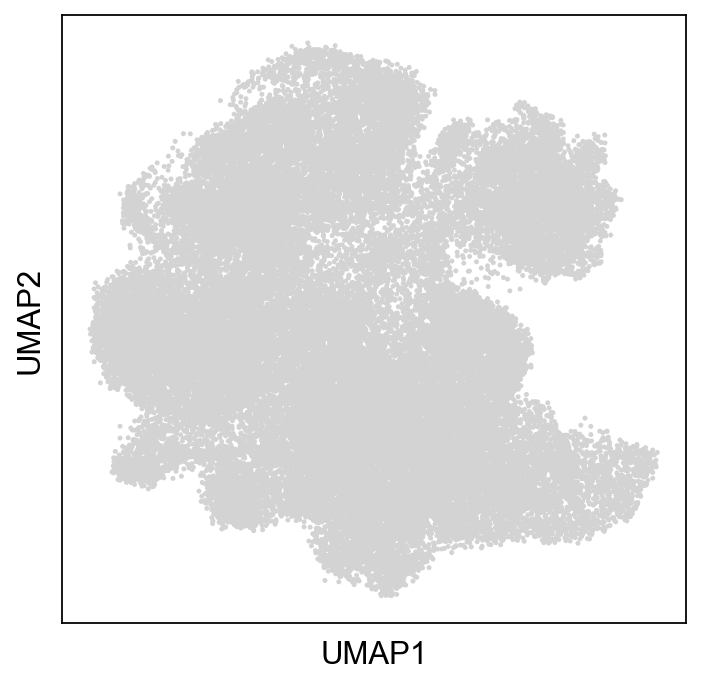

In [8]:
sc.pl.umap(adata_mult_fate, s=20)

In [9]:
adata_mult_fate[(adata_mult_fate.obs_names.isin(clone_2['cell.bc']))]

View of AnnData object with n_obs × n_vars = 119 × 100
    obs: 'day', 'time_info', 'state_info', 'assay'
    uns: 'neighbors', 'umap'
    obsm: 'X_ccal2', 'X_draw_graph_fa', 'X_emb', 'X_umap'
    obsp: 'connectivities', 'distances'

In [10]:
adata_mult_fate.obs['assay'] = adata_mult_fate.obs_names.map(lambda x:x.split("-")[1])

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


Text(0.5, 1.0, 'clone 2')

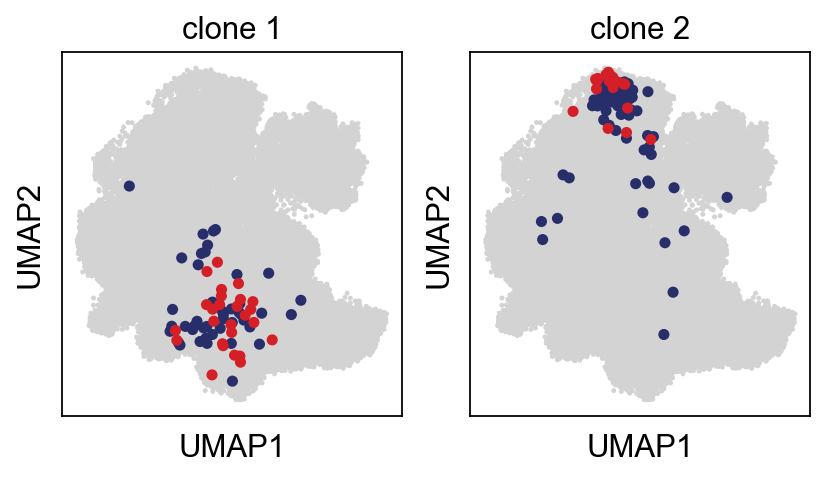

In [11]:
plt.figure(figsize=(6,3))
gs = GridSpec(1,2)
ax=plt.subplot(gs[0])
sc.pl.umap(adata_mult_fate, s=20,ax=ax, show=False)
sc.pl.umap(adata_mult_fate[(adata_mult_fate.obs_names.isin(clone_1['cell.bc'])) & (adata_mult_fate.obs.assay=='RNA')], na_color=rna_col,s=100, ax=ax, show=False, frameon=True)
sc.pl.umap(adata_mult_fate[(adata_mult_fate.obs_names.isin(clone_1['cell.bc'])) & (adata_mult_fate.obs.assay=='ATAC')], na_color=atac_col,s=100, ax=ax, show=False, frameon=True)
plt.title('clone 1')

ax=plt.subplot(gs[1])
sc.pl.umap(adata_mult_fate, s=20,ax=ax, show=False)
sc.pl.umap(adata_mult_fate[(adata_mult_fate.obs_names.isin(clone_2['cell.bc'])) & (adata_mult_fate.obs.assay=='RNA')], na_color=rna_col,s=100, ax=ax, show=False, frameon=True)
sc.pl.umap(adata_mult_fate[(adata_mult_fate.obs_names.isin(clone_2['cell.bc'])) & (adata_mult_fate.obs.assay=='ATAC')], na_color=atac_col,s=100, ax=ax, show=False, frameon=True)
plt.title('clone 2')

# plt.savefig("./plots_rev1/two_clones_on_umap_rev1.pdf")

In [12]:
adata_rna = sc.read_h5ad("../rna_analysis/anndata_objs/all_rna_new_rev1.h5ad")

In [13]:
#load clone_table
clone_table = pd.read_csv("../celltag_analysis/mult/proc_files/b4.rna&atac.r1&2_master_rev1_annotated.csv", index_col=0)
clone_1 = clone_table[clone_table['clone_id']=='r1_2'].copy()
clone_2 = clone_table[clone_table['clone_id']=='r2_6'].copy()



In [14]:
adata_rna.obs['clonal_expr'] = 'na'
adata_rna.obs['clonal_expr'][adata_rna.obs_names.isin(clone_1['cell.bc'])] = 'clone_1'
adata_rna.obs['clonal_expr'][adata_rna.obs_names.isin(clone_2['cell.bc'])] = 'clone_2'


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [15]:
adata_rna = adata_rna[adata_rna.obs.clonal_expr!='na'].copy()

([], [])

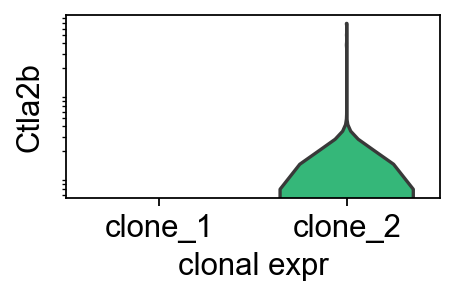

In [16]:
plt.figure(figsize=(3,1.5))
ax=plt.axes()
sc.pl.violin(adata_rna, keys=['Ctla2b'], groupby='clonal_expr', stripplot=False, use_raw=True,
             log=True, ax=ax, show=False, palette='viridis', saturation=1)
plt.grid(False)
plt.yticks([])
# plt.savefig("./plots_rev1/2clones_ctla2b_expr.pdf")

## RNA-ATAC corr

In [47]:
all_genes_df = pd.read_csv("./plots_data_rev1//gsm_gex_corr_raw_cellgene.csv", index_col=0)

#avg by clones
all_genes_df_mean = all_genes_df.groupby(['clone_id','assay'], as_index=False).mean()
all_genes_df_mean_arr = all_genes_df_mean.iloc[:,2:].values

#scale data
all_genes_df_mean_arr = (all_genes_df_mean_arr - all_genes_df_mean_arr.mean(axis=1)[:,np.newaxis])/np.std(all_genes_df_mean_arr, axis=1)[:,np.newaxis]

#create df from scaled data
all_genes_df_mean_arr = pd.DataFrame(all_genes_df_mean_arr, columns=all_genes_df_mean.columns[2:])

#add metadata
all_genes_df_mean_arr['clone_id'] = all_genes_df_mean['clone_id']
all_genes_df_mean_arr['assay'] = all_genes_df_mean['assay']
all_genes_df_mean_arr['net_ct'] = all_genes_df_mean_arr.iloc[:,:-2].sum(axis=1)

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [48]:
#select for large clone in the clone table, the tble was subsetted for 40k cells so existing counts from the table cant be used
large_clones = []
clone_nums = clone_table.groupby(['clone_id','assay'], as_index=False).count().copy()

for i,j in clone_nums.groupby('clone_id'):
    if(len(j)==2):
        if(j['cell.bc'].min() > 3):
            large_clones.append(i)
            
clones_to_plot = large_clones
print(len(clones_to_plot))

29


In [38]:
df = pd.DataFrame(index=clones_to_plot, columns=clones_to_plot)

for row_idx in clones_to_plot:  #atac data
    for col_idx in clones_to_plot:   #rna data
        df1 = all_genes_df_mean_arr[(all_genes_df_mean_arr['clone_id']==row_idx) & 
                                 (all_genes_df_mean_arr['assay']=='ATAC')]
        df2 = all_genes_df_mean_arr[(all_genes_df_mean_arr['clone_id']==col_idx) & 
                                (all_genes_df_mean_arr['assay']=='RNA')]
        
        if(min(len(df1), len(df2)) > 0):  
            val1 = df1.iloc[:,:-3].values[0]
            val2 = df2.iloc[:,:-3].values[0]
        
        df.loc[row_idx,col_idx] = pearsonr(val1,val2)[0]
        
df = df.astype(float).copy()

inter_lin vs. intra_lin: Mann-Whitney-Wilcoxon test two-sided, P_val:5.158e-04 U_stat=1.624e+04


(<AxesSubplot: ylabel='RNA - ATAC correlation'>,
 [<statannotations.Annotation.Annotation at 0x148934a82460>])

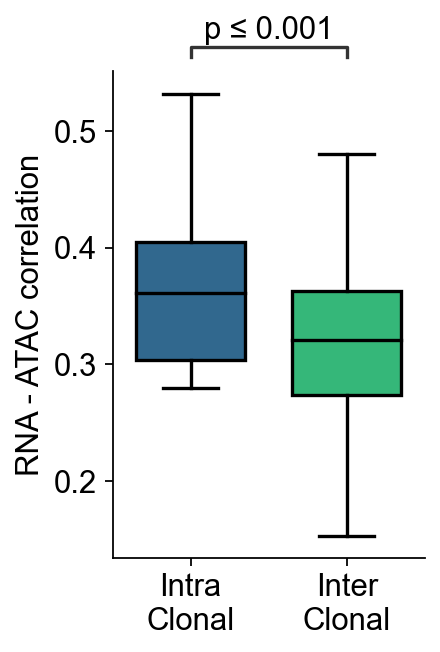

In [39]:
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

inter_lin = np.diag(df)

x = np.where(~np.eye(len(df),dtype=bool))
intra_lin = np.array([df.iloc[i[0],i[1]] for i in zip(x[0],x[1])])

inter_lin = np.stack((inter_lin,['inter_lin']*len(inter_lin)))
intra_lin = np.stack((intra_lin,['intra_lin']*len(intra_lin)))

dist_df = pd.DataFrame(np.hstack((inter_lin,intra_lin)), index = ['vals','grp']).T
dist_df['vals'] = dist_df['vals'].astype(float)

plt.figure(figsize=(2.5,4))
sns.boxplot(x = 'grp',y='vals',data=dist_df, palette='viridis', width=0.7, saturation=1,
            flierprops={'marker': 'o', 'markersize': 7, 'markerfacecolor': 'white'}, **PROPS)
plt.grid(False)
plt.xlabel("")
plt.ylabel("RNA - ATAC correlation")
plt.xticks(ticks=[0,1], labels=['Intra\nClonal', 'Inter\nClonal'])

ax=plt.gca()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

pairs=[("inter_lin", "intra_lin")]
x='grp'
y='vals'
annotator = Annotator(ax, pairs, data=dist_df, x=x, y=y)
annotator.configure(test='Mann-Whitney', text_format
                    ='simple', loc='outside', show_test_name=False)
annotator.apply_and_annotate()
# plt.savefig("./plots_rev1/rna_atac_corr_intra_inter_clonal_rev1.pdf")